# PRCP-1014

#### Vaccinatino Prediction Description- Project

Team Members: Vivek Viswanathan, Sushree Sarangi, Vartika Vishnoi, and Prabhati Acharya

In [101]:
!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27090 sha256=4888e4dcf70322c9b5ea2e86f277a9660b321014600667f29ab27782bb847dae
  Stored in directory: C:\Users\PRABHATI\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291997 sha256=874374b2abfb6638f9cce5d8709b4b56f0412e3f4e5cc6294649b60d7d732bf3
  Stored in directory: C:\Users\PRABHATI\AppData\Local\pip\Cache\wheels\07\1c\dc\6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1


ERROR: matplotlib 3.3.1 has requirement certifi>=2020.06.20, but you'll have certifi 2019.9.11 which is incompatible.
ERROR: phik 0.10.0 has requirement joblib>=0.14.1, but you'll have joblib 0.13.2 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\prabhati\\anaconda3\\lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [102]:
# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
import itertools
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_selection import RFECV
from vecstack import stacking
from mlxtend.classifier import StackingCVClassifier
from mlxtend.plotting import plot_learning_curves, plot_decision_regions
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.calibration import CalibratedClassifierCV
from pandas_profiling import ProfileReport
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.externals.six import StringIO
import graphviz

import warnings
warnings.simplefilter('ignore')

ModuleNotFoundError: No module named 'pandas_profiling'

In [11]:
rand_state = 10
n_iterations = 5

In [23]:
# Load the data
feature_data = pd.read_csv('features.csv')

In [24]:
feature_data.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [25]:
feature_data.shape

(26707, 36)

In [26]:
label_data= pd.read_csv('labels.csv')

In [27]:
label_data.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [28]:
label_data.shape

(26707, 3)

In [30]:
vaccine_data=pd.concat([feature_data, label_data],sort=False)

In [31]:
vaccine_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,NaN,NaN
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,NaN,NaN
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,NaN,NaN


In [32]:
print("Shape :",vaccine_data.shape)
print("Rows : ",vaccine_data.shape[0])
print("Columns : ",vaccine_data.shape[1])
print("\nFeatures : \n" ,vaccine_data.columns.tolist())
print("\n Missing Values : ",vaccine_data.isnull().sum().values.sum())
print("\nUnique Values : \n" ,vaccine_data.nunique(dropna=False))

Shape : (53414, 38)
Rows :  53414
Columns :  38

Features : 
 ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine']

 Missing Values :  1048921

Unique Values : 
 respondent_id                  26707
h1n1_concern                       5
h1n1_knowledg

In [33]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53414 entries, 0 to 26706
Data columns (total 38 columns):
respondent_id                  53414 non-null int64
h1n1_concern                   26615 non-null float64
h1n1_knowledge                 26591 non-null float64
behavioral_antiviral_meds      26636 non-null float64
behavioral_avoidance           26499 non-null float64
behavioral_face_mask           26688 non-null float64
behavioral_wash_hands          26665 non-null float64
behavioral_large_gatherings    26620 non-null float64
behavioral_outside_home        26625 non-null float64
behavioral_touch_face          26579 non-null float64
doctor_recc_h1n1               24547 non-null float64
doctor_recc_seasonal           24547 non-null float64
chronic_med_condition          25736 non-null float64
child_under_6_months           25887 non-null float64
health_worker                  25903 non-null float64
health_insurance               14433 non-null float64
opinion_h1n1_vacc_effective  

In [34]:
vaccine_data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,53414.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.718984,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.750000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [99]:
print('\nUnique values of vaccine_data.h1n1_concern:: \n',vaccine_data.h1n1_concern.value_counts(dropna = False))
print('\nUnique values of vaccine_data.h1n1_knowledge:: \n',vaccine_data.h1n1_knowledge.value_counts(dropna = False))
print('\nUnique values of behavioral_antiviral_meds:: \n',vaccine_data.behavioral_antiviral_meds.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_avoidance:: \n',vaccine_data.behavioral_avoidance.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_face_mask:: \n',vaccine_data.behavioral_face_mask.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_wash_hands:: \n',vaccine_data.behavioral_wash_hands.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_large_gatherings:: \n',vaccine_data.behavioral_large_gatherings.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_outside_home:: \n',vaccine_data.behavioral_outside_home.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_touch_face:: \n',vaccine_data.behavioral_touch_face.value_counts(dropna = False))
print('\nUnique values of vaccine_data.doctor_recc_h1n1 :: \n',vaccine_data.doctor_recc_h1n1 .value_counts(dropna = False))
print('\nUnique values of vaccine_data.doctor_recc_seasonal :: \n',vaccine_data.doctor_recc_seasonal .value_counts(dropna = False))
print('\nUnique values of vaccine_data.chronic_med_condition :: \n',vaccine_data.chronic_med_condition .value_counts(dropna = False))
print('\nUnique values of vaccine_data.child_under_6_months:: \n',vaccine_data.child_under_6_months.value_counts(dropna = False))
print('\nUnique values of vaccine_data.health_worker:: \n',vaccine_data.health_worker.value_counts(dropna = False))
print('\nUnique values of vaccine_data.health_insurance :: \n',vaccine_data.health_insurance .value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_h1n1_vacc_effective:: \n',vaccine_data.opinion_h1n1_vacc_effective.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_h1n1_risk:: \n',vaccine_data.opinion_h1n1_risk.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_h1n1_sick_from_vacc:: \n',vaccine_data.opinion_h1n1_sick_from_vacc.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_seas_vacc_effective:: \n',vaccine_data.opinion_seas_vacc_effective.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_seas_risk:: \n',vaccine_data.opinion_seas_risk.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_seas_sick_from_vacc:: \n',vaccine_data.opinion_seas_sick_from_vacc.value_counts(dropna = False))
print('\nUnique values of vaccine_data.age_group:: \n',vaccine_data.age_group.value_counts(dropna = False))
print('\nUnique values of vaccine_data.education :: \n',vaccine_data.education .value_counts(dropna = False))
print('\nUnique values of vaccine_data.race :: \n',vaccine_data.race .value_counts(dropna = False))
print('\nUnique values of vaccine_data.sex  :: \n',vaccine_data.sex  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.income_poverty  :: \n',vaccine_data.income_poverty .value_counts(dropna = False))
print('\nUnique values of vaccine_data.marital_status  :: \n',vaccine_data.marital_status  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.rent_or_own  :: \n',vaccine_data.rent_or_own  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.employment_status  :: \n',vaccine_data.employment_status .value_counts(dropna = False))
print('\nUnique values of vaccine_data.hhs_geo_region   :: \n',vaccine_data.hhs_geo_region .value_counts(dropna = False))
print('\nUnique values of vaccine_data.census_msa   :: \n',vaccine_data.census_msa  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.household_adults:: \n',vaccine_data.household_adults.value_counts(dropna = False))
print('\nUnique values of vaccine_data.household_children:: \n',vaccine_data.household_children.value_counts(dropna = False))
print('\nUnique values of vaccine_data.employment_industry:: \n',vaccine_data.employment_industry.value_counts(dropna = False))
print('\nUnique values of vaccine_data.employment_occupation :: \n',vaccine_data.employment_occupation .value_counts(dropna = False))
print('\nUnique values of vaccine_data.h1n1_vaccine  :: \n',vaccine_data.h1n1_vaccine  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.seasonal_vaccine  :: \n',vaccine_data.seasonal_vaccine .value_counts(dropna = False))



Unique values of vaccine_data.h1n1_concern:: 
 2        10575
1         8153
3         4591
0         3296
20480        1
         ...  
10928        1
8881         1
15026        1
12979        1
14313        1
Name: h1n1_concern, Length: 26803, dtype: int64

Unique values of vaccine_data.h1n1_knowledge:: 
 1        14598
2         9487
0         2506
4074         1
13548        1
         ...  
21151        1
10928        1
8881         1
15026        1
12266        1
Name: h1n1_knowledge, Length: 26826, dtype: int64

Unique values of behavioral_antiviral_meds:: 
 0        25335
1         1301
15693        1
11567        1
21824        1
         ...  
693          1
6838         1
4791         1
25273        1
6125         1
Name: behavioral_antiviral_meds, Length: 26780, dtype: int64

Unique values of vaccine_data.behavioral_avoidance:: 
 1        19228
0         7271
16386        1
9454         1
21824        1
         ...  
21151        1
10928        1
8881         1
15026    

In [98]:
#for i in total_data:
   # df=print('\nUnique values :: \n',vaccine_data[i].value_counts(dropna = False)) 
    

In [41]:
vaccine_data.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

###### Grouping columns into Categorical and Continuous column list

In [36]:
# Grouping columns into Categorical and Continuous column list
Catvar_list=['income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']
Convar_list=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','household_adults','household_children']


###### Checking the distribution of data for continuous variables

In [37]:
#for i in Convar_list:
    #df[i]=total_data[i].astype('float').astype(int)
    #df[i]=total_data[i]
    #df.dtypes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017248F7EC88>,
      dtype=object)

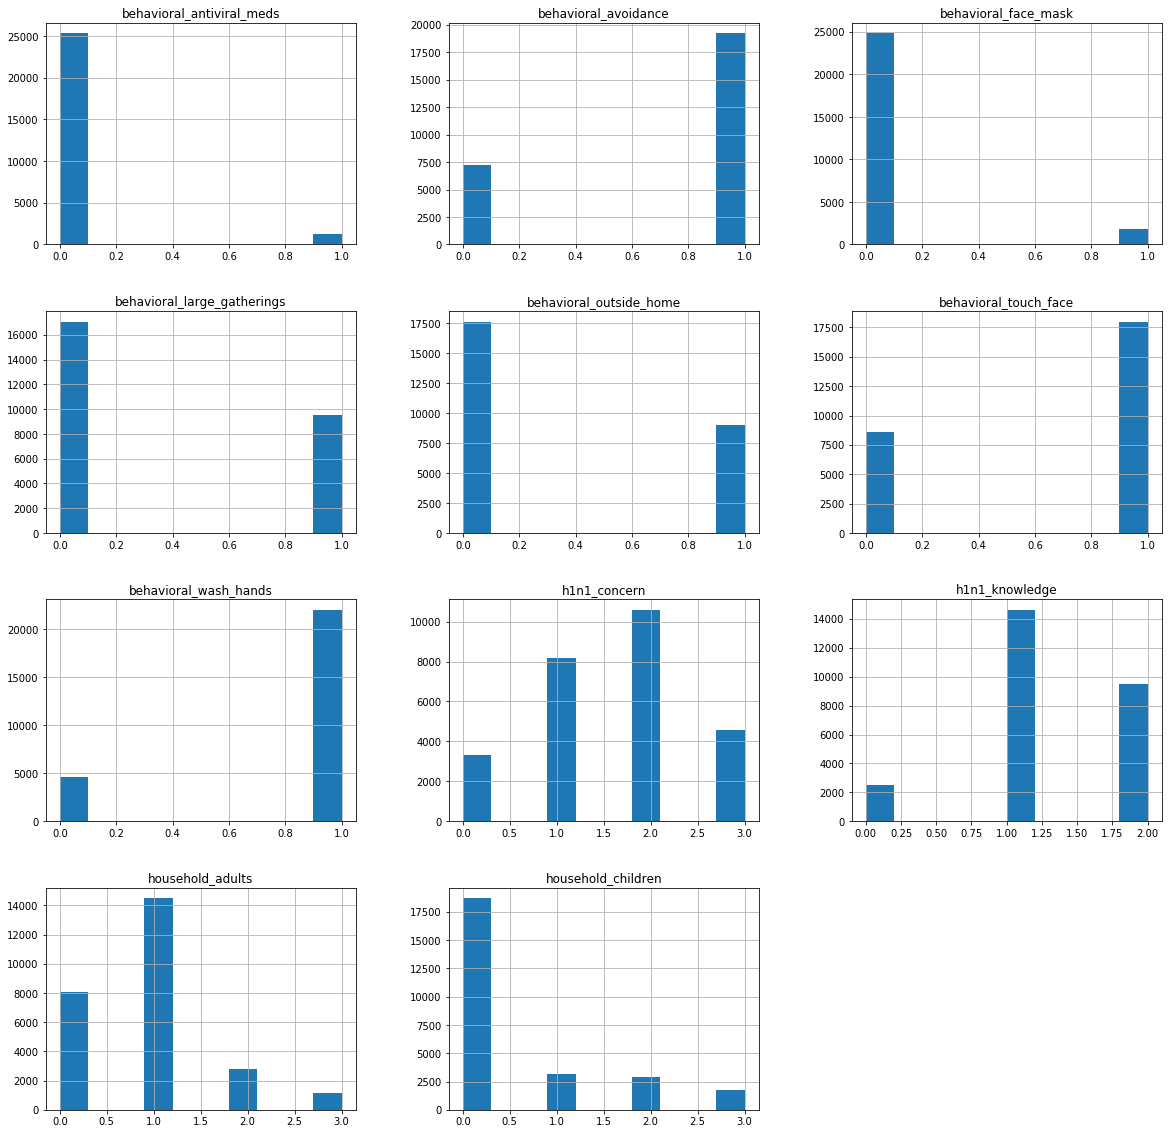

In [38]:
vaccine_data[Convar_list].hist(figsize=(20,20))

###### Checking the Data distribution for the Categorical features

C:\Users\PRABHATI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


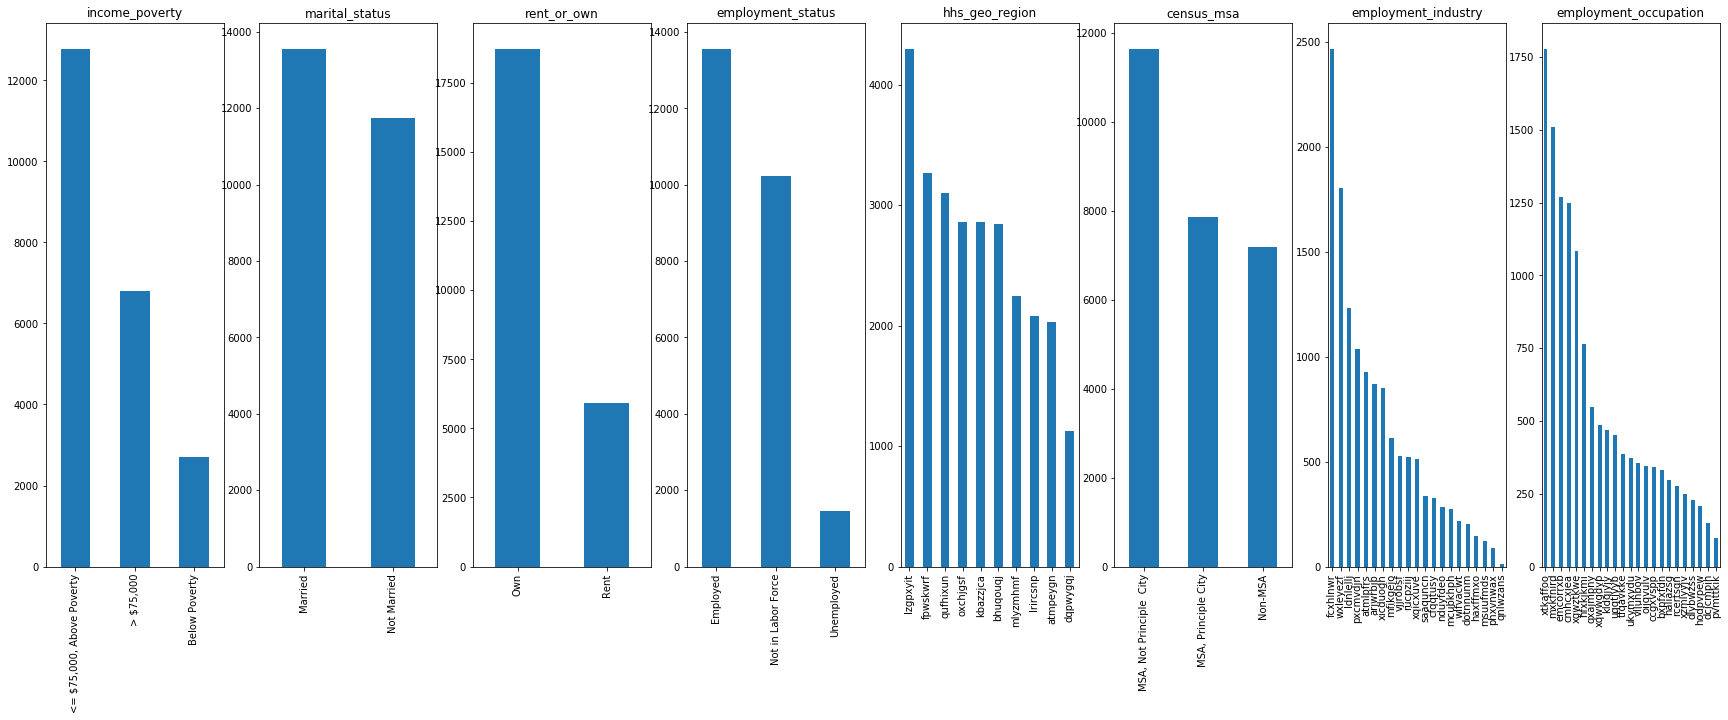

In [82]:
#Plot categorical data using Seaborn's facegrid and Panda's melt function
fig, ax=plt.subplots(1, len(Catvar_list) , figsize=(30,10))
for i, j in enumerate(vaccine_data[Catvar_list]):
    vaccine_data[j].value_counts().plot(kind="bar", ax=ax[i]).set_title(j)
    
fig.show()

###### Correlation Matrix

In [85]:
cormat=vaccine_data.corr()
#print(cor_mat)
plt.figure(figsize= (5,5))
#. heatmap(cor_mat, annot=True)
cormat.style.background_gradient(cmap='coolwarm').set_precision(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,1,0.018,0.0034,-0.0085,0.0096,-0.0066,0.011,0.0045,0.009,0.0076,-0.0021,0.0015,0.0058,-0.0048,-0.0031,-0.013,0.0059,0.00096,-0.0023,0.0059,-0.0053,0.0096,0.00019,-0.0037,-0.0033,-0.0047
h1n1_concern,0.018,1,0.063,0.09,0.23,0.16,0.29,0.26,0.25,0.25,0.15,0.14,0.095,0.05,0.034,-0.0037,0.24,0.38,0.36,0.24,0.33,0.23,-0.016,0.051,nan,nan
h1n1_knowledge,0.0034,0.063,1,-0.011,0.089,0.03,0.09,-0.049,-0.068,0.086,0.094,0.072,-0.023,0.022,0.17,0.12,0.12,0.073,-0.02,0.086,0.077,-0.062,0.025,0.051,nan,nan
behavioral_antiviral_meds,-0.0085,0.09,-0.011,1,0.049,0.15,0.064,0.11,0.13,0.071,0.051,0.031,0.0085,0.029,0.0095,-0.064,0.03,0.11,0.079,0.015,0.085,0.084,0.045,0.085,nan,nan
behavioral_avoidance,0.0096,0.23,0.089,0.049,1,0.065,0.34,0.23,0.22,0.34,0.068,0.074,0.039,-0.00041,0.0012,0.033,0.11,0.12,0.13,0.12,0.13,0.083,0.019,0.04,nan,nan
behavioral_face_mask,-0.0066,0.16,0.03,0.15,0.065,1,0.083,0.18,0.16,0.1,0.084,0.069,0.068,0.04,0.07,-0.04,0.038,0.13,0.11,0.042,0.11,0.09,0.014,0.0058,nan,nan
behavioral_wash_hands,0.011,0.29,0.09,0.064,0.34,0.083,1,0.2,0.19,0.37,0.089,0.1,0.03,0.036,0.054,0.032,0.14,0.17,0.15,0.14,0.17,0.088,0.0097,0.048,nan,nan
behavioral_large_gatherings,0.0045,0.26,-0.049,0.11,0.23,0.18,0.2,1,0.58,0.25,0.082,0.094,0.1,0.021,-0.032,-0.059,0.052,0.13,0.19,0.078,0.13,0.14,-0.032,-0.0094,nan,nan
behavioral_outside_home,0.009,0.25,-0.068,0.13,0.22,0.16,0.19,0.58,1,0.27,0.07,0.086,0.099,0.018,-0.035,-0.061,0.051,0.13,0.17,0.067,0.12,0.14,-0.028,-0.0096,nan,nan
behavioral_touch_face,0.0076,0.25,0.086,0.071,0.34,0.1,0.37,0.25,0.27,1,0.088,0.1,0.029,0.027,0.068,0.011,0.1,0.15,0.13,0.11,0.14,0.09,-0.00055,0.024,nan,nan


<Figure size 360x360 with 0 Axes>

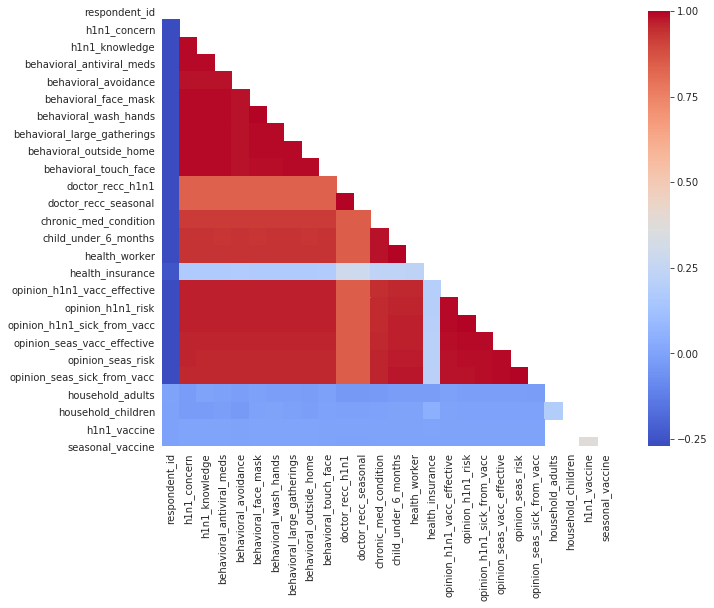

In [91]:
corr=vaccine_data.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

with sns.axes_style("white"):
    f, ax=plt.subplots(figsize=(12,8))
    ax=sns.heatmap(corr,mask=mask,vmax=1,square=True,cmap='coolwarm')

In [ ]:
#sns.boxplot(data=vaccine_data,y='seasonal_vaccine ',x='health worker')

In [ ]:
#from sklearn.preprocessing import LabelEncoder

#encoder=LabelEncoder()

#for i in vaccine_data:
    #vaccine_data[i]=encoder.fit_transform(vaccine_data[i])
  #  vaccine_data.head()